In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1x7YC8lHxQWXTj1b-Jw0hIq4AT9iK9niJ' 
output = 'dataset.zip' 
gdown.download(url, output, quiet=False)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1x7YC8lHxQWXTj1b-Jw0hIq4AT9iK9niJ 



In [7]:
!cp -r '/content/drive/MyDrive/Mendung' '/content/dataset'

In [4]:
!mkdir dataset

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input, # Use this preprocess input for transfer learning!
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest', 
    validation_split=0.1
)

In [16]:
IMG_SIZE = 150 # This's size for transfer learning, this's good 300 (or upper than 220)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset',             # Source directory
    target_size=(IMG_SIZE,IMG_SIZE),  # Resizes images
    batch_size=32,
    class_mode='categorical',         # Remember to change based the class
    subset = 'training'
)
    
validation_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 717 images belonging to 3 classes.
Found 179 images belonging to 3 classes.


In [22]:
del model

In [23]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3) ), # Standard image shape
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(145, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax'),
]) 

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nAccuracy better than target training!")
      self.model.stop_training = True

callbacks = myCallback()

In [26]:
%%time
history = model.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    callbacks=[callbacks]
)

Epoch 1/15
717/717 [==============================] - 21s 29ms/step - loss: 0.9123 - accuracy: 0.5509 - val_loss: 0.7038 - val_accuracy: 0.7821
Epoch 2/15
717/717 [==============================] - 21s 29ms/step - loss: 0.7879 - accuracy: 0.6611 - val_loss: 0.6052 - val_accuracy: 0.6927
Epoch 3/15
717/717 [==============================] - 21s 29ms/step - loss: 0.7072 - accuracy: 0.7517 - val_loss: 0.5990 - val_accuracy: 0.6760
Epoch 4/15
717/717 [==============================] - 20s 28ms/step - loss: 0.6683 - accuracy: 0.7894 - val_loss: 0.5418 - val_accuracy: 0.8045
Epoch 5/15
717/717 [==============================] - 20s 28ms/step - loss: 0.4105 - accuracy: 0.8842 - val_loss: 0.3388 - val_accuracy: 0.8827
Epoch 6/15
717/717 [==============================] - 20s 27ms/step - loss: 0.3171 - accuracy: 0.9010 - val_loss: 0.5321 - val_accuracy: 0.7989
Epoch 7/15
717/717 [==============================] - 20s 28ms/step - loss: 0.2561 - accuracy: 0.9177 - val_loss: 0.4537 - val_accuracy:

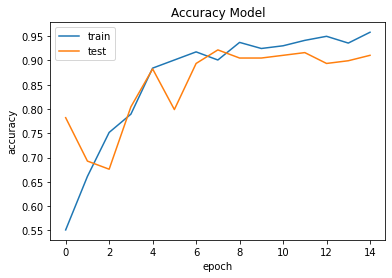

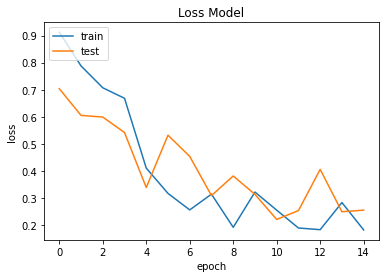

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model.save("model/model_TA_v2.h5")

In [34]:
!du -sh model.zip

28M	model.zip


In [33]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/model_TA_v2.h5 (deflated 32%)


In [36]:
from keras.preprocessing import image
import numpy as np

new_image = image.load_img('/content/images.jpg', \
                           target_size = (IMG_SIZE,IMG_SIZE))
new_image

new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
new_image = tf.keras.applications.mobilenet.preprocess_input(new_image)
result = model.predict(new_image)
print(result)
result_final = np.argmax(result)
result_final

[[5.0064824e-14 2.4507644e-16 1.0000000e+00]]


2